In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [87]:
mvid = pd.read_csv('MVID_101001_171001.txt')
sber = pd.read_csv('SBER_101001_171001.txt')
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [88]:
print(sber.isna().sum(),'\n')
print(mvid.isna().sum())

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64 

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64


In [89]:
res = pd.merge(sber, mvid, on='<DATE>')
res.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [90]:
x = res['<CLOSE>_x']
y = res['<CLOSE>_y']

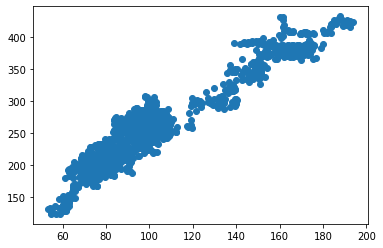

In [91]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [92]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1
    

In [93]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 36271.58344889084


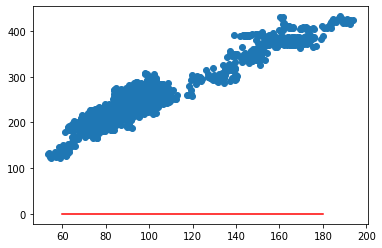

In [94]:
X0 = np.linspace(60, 180, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

error after gradient descent: 6734.135540194945


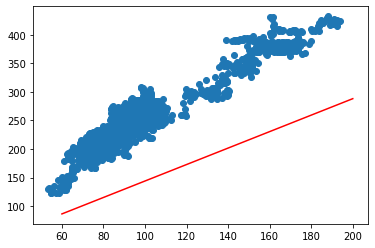

In [95]:
hyp.BGD(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)
X0 = np.linspace(60, 200, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Реализуйте механизм адаптивной скорости обучения.

In [96]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

        
    def BGD_AUTO(self, X, Y, accuracy=0.01, max_steps=5000):
            alpha = 5 
            steps, errors = [], []
            step = 0        
            old_err = hyp.error(X, Y)
            new_err = hyp.error(X, Y) - 1
            dJ = 1
            while (dJ > accuracy) and (step < max_steps):
                dJ0 = sum(self.predict(X) - Y) /len(X)
                dJ1 = sum((self.predict(X) - Y) * X) /len(X)
                self.b0 -= alpha * dJ0
                self.b1 -= alpha * dJ1            
                old_err = new_err
                new_err = hyp.error(X, Y)
                if old_err < new_err:
                  alpha *= 0.1
                dJ = abs(old_err - new_err) 
                step += 1            
                steps.append(step)
                errors.append(new_err)
            print(alpha)
            return steps, errors

In [97]:
hyp = hypothesis()
steps, errors = hyp.BGD_AUTO(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)


5.0000000000000016e-05
error after gradient descent: 217.41809243019574


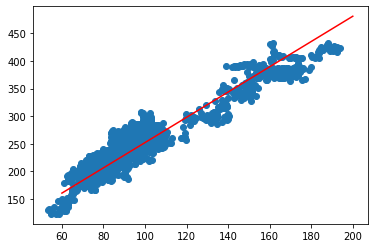

In [98]:
X0 = np.linspace(60, 200, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

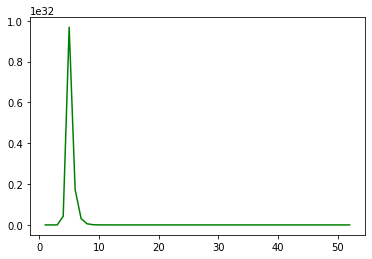

In [99]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# Дополнительные задания


Постройте модель регрессии на другой паре инструментов.

In [100]:
sber = pd.read_csv('SBER_101001_171001.txt')
yndx = pd.read_csv('YNDX_101001_171001.txt')
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [101]:
print(sber.isna().sum(),'\n')
print(yndx.isna().sum())

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64 

<TICKER>    0
<PER>       0
<DATE>      0
<TIME>      0
<CLOSE>     0
<VOL>       0
dtype: int64


In [102]:
data = pd.merge(sber, yndx, on='<DATE>')
data.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20140604,0,87.81,118784670,YNDX,D,0,1170.0,35146
1,SBER,D,20140605,0,87.43,136633680,YNDX,D,0,1145.1,24973
2,SBER,D,20140606,0,89.00,127884670,YNDX,D,0,1163.0,7889
3,SBER,D,20140609,0,88.89,84744280,YNDX,D,0,1172.1,7304
4,SBER,D,20140610,0,88.99,85841300,YNDX,D,0,1170.0,3207


In [103]:
x_1 = data['<CLOSE>_x']
y_1 = data['<CLOSE>_y']

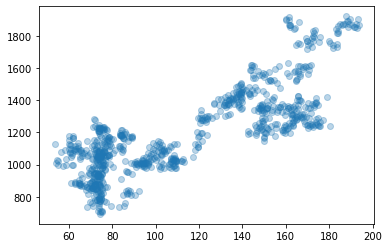

In [104]:
plt.figure()
plt.scatter(x_1, y_1, alpha=0.3)
plt.show()

In [105]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(170))
J = hyp.error(x_1, y_1)
print("initial error:", J)

0
0
initial error: 754518.5925656324


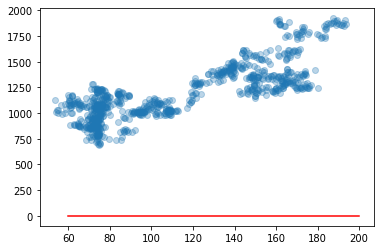

In [106]:
X1 = np.linspace(60, 200, 100)
Y1 = hyp.predict(X1)
plt.figure()
plt.scatter(x_1, y_1, alpha=0.3)
plt.plot(X1, Y1, 'r')
plt.show()

error after gradient descent: 87657.19628240091


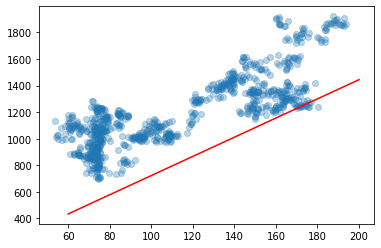

In [107]:
hyp.BGD(x_1, y_1)
J = hyp.error(x_1, y_1)
print("error after gradient descent:", J)
X1 = np.linspace(60, 200, 100)
Y1 = hyp.predict(X1)
plt.figure()
plt.scatter(x_1, y_1, alpha=0.3)
plt.plot(X1, Y1, 'r')
plt.show()

In [108]:
hyp = hypothesis()
steps, errors = hyp.BGD_AUTO(x_1, y_1)
J = hyp.error(x_1, y_1)
print("error after gradient descent:", J)

5.0000000000000016e-05
error after gradient descent: 15312.965387445764


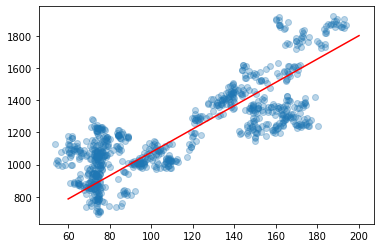

In [109]:
X1 = np.linspace(60, 200, 100)
Y1 = hyp.predict(X1)
plt.figure()
plt.scatter(x_1, y_1, alpha=0.3)
plt.plot(X1, Y1, 'r')
plt.show()

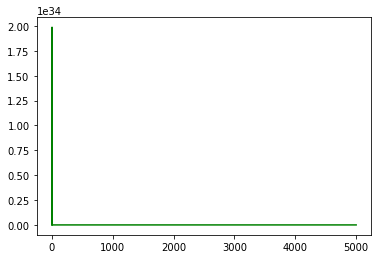

In [110]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [111]:
class hypothesis(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.error_log = []

    def predict(self, x):
        return self.b0 + self.b1 * x


    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 


    def BGD(self, X, Y):  
        alpha = 0.00005
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

        
    def BGD_AUTO(self, X, Y, accuracy=0.01, max_steps=5000):
            alpha = 1 
            steps, errors = [], []
            step = 0        
            old_err = hyp.error(X, Y)  
            new_err = hyp.error(X, Y) - 1
            dJ = 1
            while (dJ > accuracy) and (step < max_steps):
                dJ0 = sum(self.predict(X) - Y) /len(X)
                dJ1 = sum((self.predict(X) - Y) * X) /len(X)
                self.b0 -= alpha * dJ0
                self.b1 -= alpha * dJ1            
                old_err = new_err
                new_err = hyp.error(X, Y)
                self.error_log.append(new_err)
                if old_err < new_err:
                  alpha *= 0.1
                dJ = abs(old_err - new_err) 
                step += 1            
                steps.append(step)
                errors.append(new_err)
            return steps, errors

In [112]:
from random import sample
mo=np.arange(256)
mt=sample(range(0,256),128)
type(mt.sort())
mo=np.setdiff1d(mo, mt)

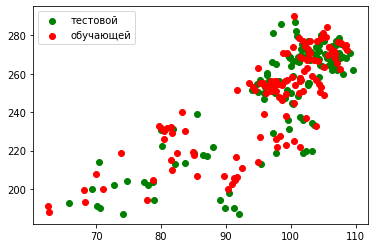

In [113]:
xo=x[mo]
xt=x[mt]
yo=y[mo]
yt=y[mt]
plt.figure()
plt.scatter(xt,yt,c='g', label='тестовой')
plt.scatter(xo, yo, c='r', label='обучающей')
plt.legend(loc='upper left')
plt.show()

In [114]:
class hypothesis:
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0    
        self.b1 = 0
        
    def predict(self,x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def BGD_AUTO(self, X, Y):
        maxc=8056

        accuracy=0.001
        steps, errors = [], []
        i = 0        
        prerr = hyp.error(X, Y)
        nerr = hyp.error(X, Y) - 1
        alpha = 0.5
        dJ = 1
        while (dJ > accuracy) and (i<maxc):
            i += 1
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1            
            prerr = nerr
            nerr = hyp.error(X, Y)
            dJ = abs(prerr - nerr)
            if nerr>=prerr:
                alpha = alpha/10
            steps.append(i)
            errors.append(nerr)
        print("Current alpha: ",alpha)
        return steps, errors

In [115]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(xo, yo)
print("initial error learning:", J)
J = hyp.error(xt, yt)
print("initial error test:", J)

0
0
initial error learning: 30807.672120703126
initial error test: 31392.523616015627


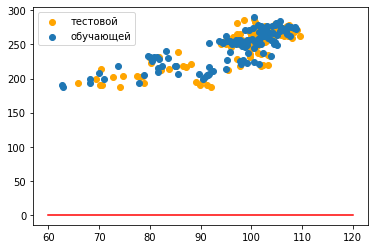

In [116]:
X0 = np.linspace(60, 120, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(xt,yt,c='orange', label='тестовые')
plt.scatter(xo, yo, label='обучающие')
plt.legend(loc='upper left')
plt.plot(X0, Y0, 'r')
plt.show()

In [117]:
steps, errors = hyp.BGD_AUTO(xo, yo)
J = hyp.error(xo, yo)
print("initial error learning:", J)
J = hyp.error(xt, yt)
print("initial error test:", J)

Current alpha:  5e-05
initial error learning: 127.63710272483664
initial error test: 138.90278271129827


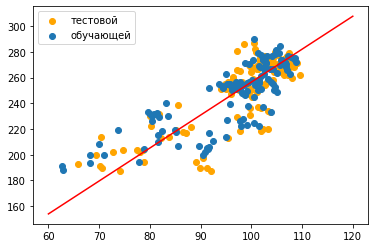

In [118]:
X0 = np.linspace(60, 120, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(xt,yt, c='orange', label='тестовой')
plt.scatter(xo, yo, label='обучающей')
plt.legend(loc='upper left')
plt.plot(X0, Y0, 'r')
plt.show()

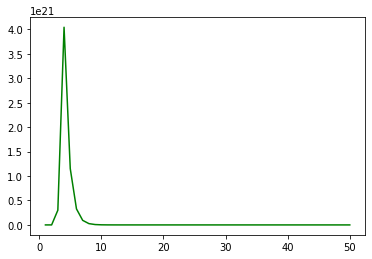

In [119]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# Научиться использовать библиотеку sklearn для построения парной линейной регрессии

In [120]:
model = LinearRegression()

По примеру программы регрессии, рассмотренной на семинаре, построить модель регрессии с использованием библиотечных средств

In [121]:
x_train = pd.DataFrame(x_1)
y_train = pd.DataFrame(y_1)

In [122]:
model.fit(x_train, y_train)
model.coef_
model.score(x_train, y_train)

0.6574232077306452

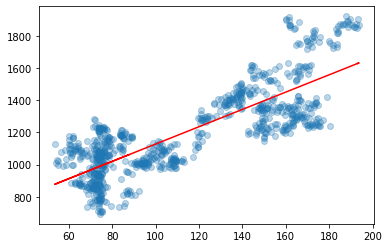

In [123]:
plt.scatter(x_1, y_1, alpha=0.3)
plt.plot(x_train, model.predict(x_train), 'r');

Сравнить результаты регрессии с использованием библиотечной функции и написанной самостоятельно.

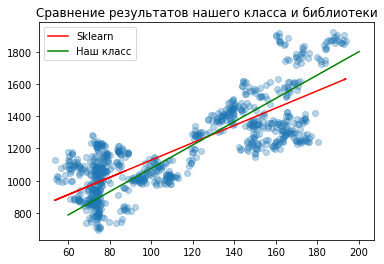

In [124]:
plt.figure()
plt.scatter(x_1, y_1, alpha=0.3)
plt.title('Сравнение результатов нашего класса и библиотеки')
plt.plot(x_train, model.predict(x_train), 'r', label="Sklearn")
plt.plot(X1, Y1, 'g', label="Наш класс")
plt.legend()
plt.show()